In [6]:
print("Hello Deloitte-HDSI Program!")

Hello Deloitte-HDSI Program!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import array as arr
from scipy import signal

In [2]:
df = pd.read_csv("job_family_role.csv")
geo = pd.read_csv("geography_industry.csv")
geo

,post_date,state,industry,count_id_indexed
0,3/1/2020,NaN,NaN,1.0000
1,3/1/2020,NaN,Communication,1.0000
2,3/1/2020,NaN,Construction,1.0000
3,3/1/2020,NaN,Energy,1.0000
4,3/1/2020,NaN,Entertainment,1.0000
...,...,...,...,...
546203,9/20/2021,WY,Real Estate,2.8571
546204,9/20/2021,WY,Retail,1.3936
546205,9/20/2021,WY,Services,1.4001
546206,9/20/2021,WY,Transportation,0.4458


In [3]:
df
geo
ca = geo[geo['state'] == 'CA']
ca


,post_date,state,industry,count_id_indexed
80,3/1/2020,CA,NaN,1.0000
81,3/1/2020,CA,Communication,1.0000
82,3/1/2020,CA,Construction,1.0000
83,3/1/2020,CA,Energy,1.0000
84,3/1/2020,CA,Entertainment,1.0000
...,...,...,...,...
545419,9/20/2021,CA,Real Estate,1.2500
545420,9/20/2021,CA,Retail,1.2284
545421,9/20/2021,CA,Services,0.8227
545422,9/20/2021,CA,Transportation,2.1977


<AxesSubplot:xlabel='post_date'>

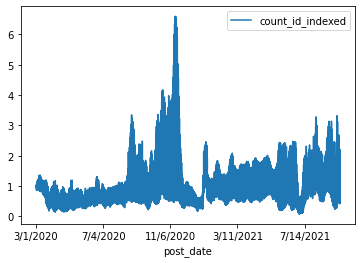

In [4]:
ca.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')

<AxesSubplot:xlabel='post_date'>

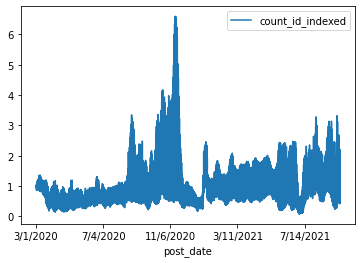

In [5]:
ca_only = geo[geo['state'] == 'CA']
ca_only.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')

# ca_realestate = ca[ca['industry'] == 'Real Estate']
# plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')
# max = ca_realestate.get('count_id_indexed').max()
# ca_realestate[ca_realestate['count_id_indexed'] == max]

In [131]:
df.dtypes

post_date           object
job_family          object
role                object
count_id_indexed    object
dtype: object

In [132]:
df['job_family'].unique()

array([nan, 'Customer Service', 'Entertainment and Recreation',
       'Facilities/Constr', 'Finance/Insurance', 'Food & Beverage',
       'Healthcare', 'Hospitality Staff', 'Human Resources', 'IT',
       'Manufacturing/Operations Staff', 'Marketing/Advertising',
       'Product Management', 'Retail Staff', 'Sales', 'Security',
       'Skilled Trades', 'Supply Chain Staff', 'Unassigned'], dtype=object)

In [133]:
df.dropna(subset = ['job_family'], axis = 0, inplace = True)
geo.dropna(subset = ['state'], axis = 0, inplace = True)
geo.dropna(subset = ['industry'], axis = 0, inplace = True)

In [118]:
df.drop(df[df["count_id_indexed"] == "\\N"].index, inplace = True)
geo.drop(geo[geo["count_id_indexed"] == "nan"].index, inplace = True)
geo.drop(geo[geo["state"] == "??"].index, inplace = True)
geo.drop(geo[geo["state"] == "Na"].index, inplace = True)
geo.drop(geo[geo["state"] == "NO"].index, inplace = True)

In [119]:
geo

,post_date,state,industry,count_id_indexed
17,3/1/2020,AK,Communication,1.0000
18,3/1/2020,AK,Construction,1.0000
19,3/1/2020,AK,Energy,1.0000
20,3/1/2020,AK,Entertainment,0.0000
21,3/1/2020,AK,Financial Services,1.0000
...,...,...,...,...
546203,9/20/2021,WY,Real Estate,2.8571
546204,9/20/2021,WY,Retail,1.3936
546205,9/20/2021,WY,Services,1.4001
546206,9/20/2021,WY,Transportation,0.4458


In [120]:
df["count_id_indexed"] = df["count_id_indexed"].astype(float)
geo["count_id_indexed"] = df["count_id_indexed"].astype(float)

In [121]:
df.dtypes

post_date            object
job_family           object
role                 object
count_id_indexed    float64
dtype: object

In [17]:
df_grby_date = df.groupby("post_date").mean().reset_index()

In [18]:
df_grby_date

,post_date,count_id_indexed
0,2020-03-01,1.000000
1,2020-03-02,1.007531
2,2020-03-03,1.022221
3,2020-03-04,1.048676
4,2020-03-05,1.060569
...,...,...
559,2021-09-16,21.909759
560,2021-09-17,24.344935
561,2021-09-18,27.826342
562,2021-09-19,23.056952


In [19]:
plt.rcParams["figure.figsize"] = (11, 7)

<AxesSubplot:xlabel='post_date'>

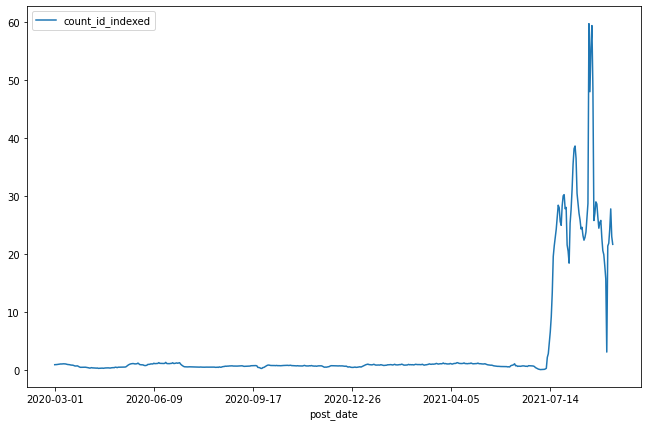

In [20]:
df_grby_date.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')

In [21]:
df_date_family = df.groupby(['job_family', 'post_date']).mean().reset_index()

In [23]:
df1 = df_date_family
df1

,job_family,post_date,count_id_indexed
0,Customer Service,2020-03-01,1.000000
1,Customer Service,2020-03-02,1.007089
2,Customer Service,2020-03-03,1.039756
3,Customer Service,2020-03-04,1.066667
4,Customer Service,2020-03-05,1.074667
...,...,...,...
10130,Unassigned,2021-09-16,3.052150
10131,Unassigned,2021-09-17,3.305895
10132,Unassigned,2021-09-18,3.544755
10133,Unassigned,2021-09-19,2.906650


In [25]:
numbersCS = np.array(range(0, len(customerService.index)))
numbersHC = np.array(range(0, len(healthcare.index)))
numbersER = np.array(range(0, len(entertainment.index)))
numbersIT = np.array(range(0, len(IT.index)))

In [26]:
mCS, bCS = np.polyfit(numbersCS, customerService, 1)
mHC, bHC = np.polyfit(numbersHC, healthcare, 1)
mER, bER = np.polyfit(numbersER, entertainment, 1)
mIT, bIT = np.polyfit(numbersIT, IT, 1)

In [27]:
print(mCS, bCS)
print(mHC, bHC)
print(mER, bER)
print(mIT, bIT)

0.026533942027609912 -3.9014247166517304
0.01870711798357364 -2.6134256402744405
0.05980500511131569 -10.011723692569172
0.048594264857262426 -8.017076918633315


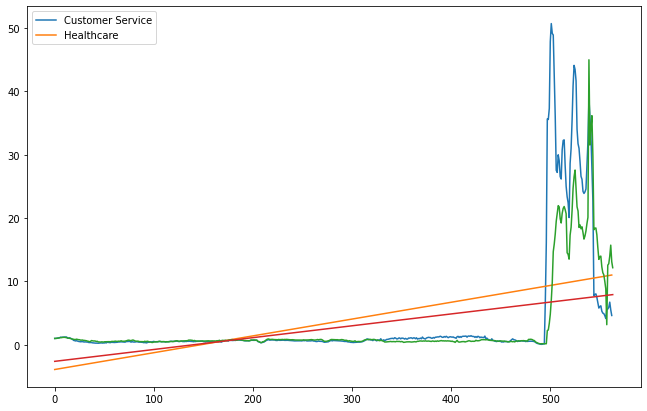

In [28]:
plt.plot(numbersCS, customerService)
plt.plot(numbersCS, mCS*numbersCS + bCS)

plt.plot(numbersHC, healthcare)
plt.plot(numbersHC, mHC*numbersHC + bHC)

# plt.plot(numbersER, entertainment, 'o')
# plt.plot(numbersER, mER*numbersER + bER) 

# plt.plot(numbersIT, mIT*numbersIT + bIT)

plt.legend(["Customer Service", "Healthcare"])

In [109]:
def CAdateFilter(dates):
    output = np.array([])
    for date in dates:
        if ((int(date[-4:]) == 2020) & (int(date[0]) >= 4 and int(date[0]) <= 8)):
            output = np.append(output, date)
    return output

<AxesSubplot:xlabel='post_date'>

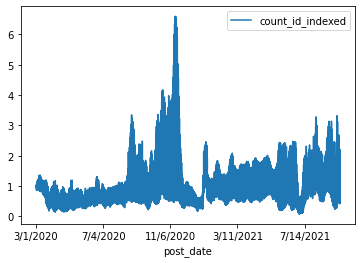

In [5]:
ca_only = geo[geo['state'] == 'CA']
ca_only.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')
# ca_only_re = ca_only[ca_only['industry'] == 'Real Estate']
# ca_only_re.get('count_id_indexed').max()

# ca_realestate = ca[ca['industry'] == 'Real Estate']
# ca_realestate.get('count_id_indexed').max()

47.1667

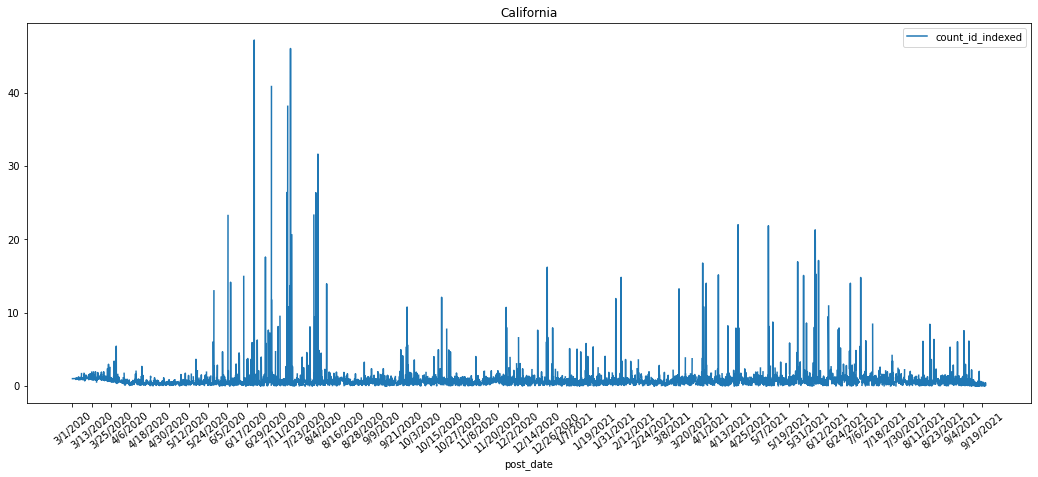

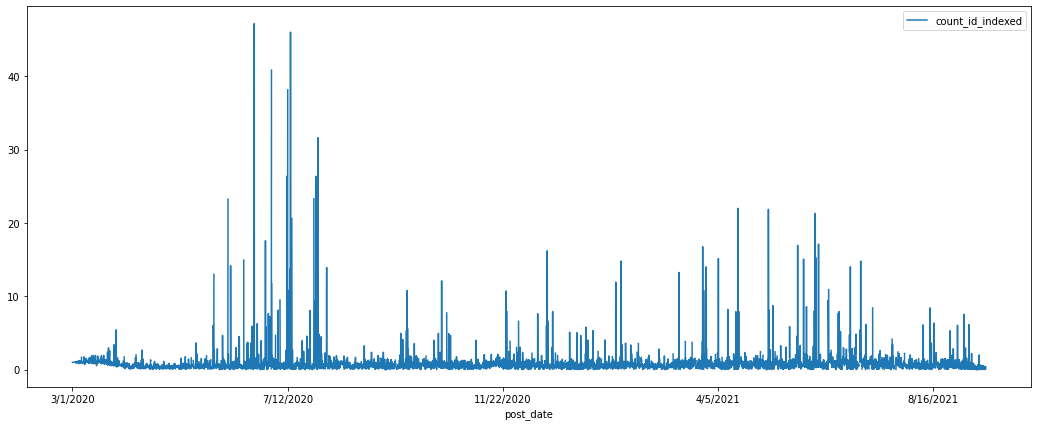

In [78]:
ca = geo[geo['state'] == 'CA']
ca_dates = ca.get('post_date')
ca_dates = CAdateFilter(ca_dates)
ca1 = ca[ca['post_date'].isin(ca_dates)]

plt.rcParams["figure.figsize"] = (18, 7)
ca.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(ca.get('post_date')), 180), 
           labels = ca.iloc[::180, :].get('post_date'), rotation = 40)
plt.title("California")

real_estate = ca1[ca1['industry'] == 'Real Estate']
# real_estate.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')
real_estate[real_estate['post_date'] == '6/20/2020']

In [32]:
apr_aug_ca = ca1.groupby(['industry']).min().reset_index()
max = ca1.groupby(['industry']).max().get('count_id_indexed').max()
apr_aug_ca.sort_values("count_id_indexed", ascending = False)

ca[ca['count_id_indexed'] == max]

,post_date,state,industry,count_id_indexed
106987,6/21/2020,CA,Real Estate,47.1667


<AxesSubplot:xlabel='post_date'>

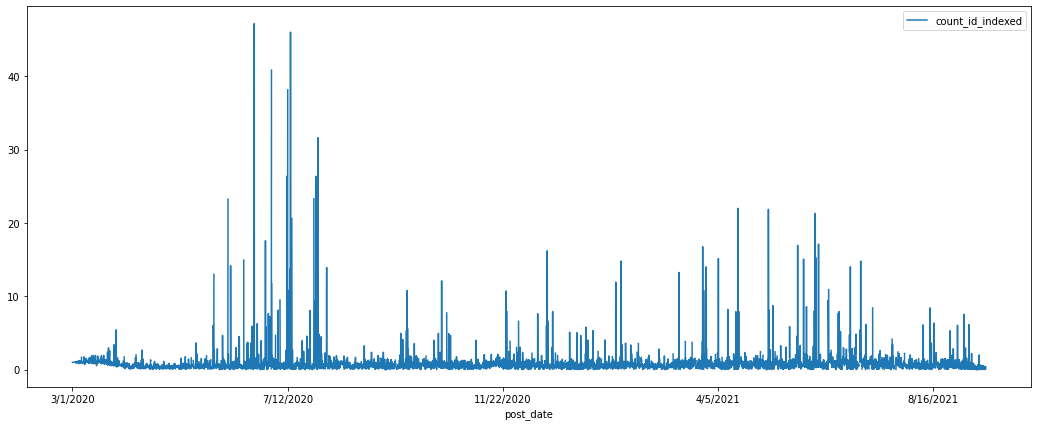

In [48]:
ca_only = geo[geo['state'] == 'CA']
ca_only.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')

In [33]:
mo = geo[geo['state'] == 'MO']
mo_dates = mo.get('post_date')
mo_dates = dateFilter(mo_dates)
mo = mo[mo['post_date'].isin(mo_dates)]

plt.rcParams["figure.figsize"] = (18, 7)
mo.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(mo.get('post_date')), 100), 
           labels = mo.iloc[::100, :].get('post_date'), rotation = 40)
plt.title("Missouri")

md = geo[geo['state'] == 'MD']
md_dates = md.get('post_date')
md_dates = dateFilter(md_dates)
md = md[md['post_date'].isin(md_dates)]

plt.rcParams["figure.figsize"] = (18, 7)
md.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(md.get('post_date')), 100), 
           labels = md.iloc[::100, :].get('post_date'), rotation = 40)
plt.title("Maryland")

ca = geo[geo['state'] == 'CA']
ca_dates = ca.get('post_date')
ca_dates = dateFilter(ca_dates)
ca = ca[ca['post_date'].isin(ca_dates)]

plt.rcParams["figure.figsize"] = (18, 7)
ca.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(ca.get('post_date')), 100), 
           labels = ca.iloc[::100, :].get('post_date'), rotation = 40)
plt.title("California")

NameError: name 'dateFilter' is not defined

In [ ]:
# look for additional data/info to explain abnormalities - specifially/especially for our findings

In [ ]:
md_industry = md.groupby(['industry']).max()
md_industry.plot(kind = 'barh')
md
plt.title("Maryland Industries")

mo_industry = mo.groupby(['industry']).max()
mo_industry.plot(kind = 'barh')
mo
plt.title("Missouri Industries")

ca_industry = ca.groupby(['industry']).max()
ca_industry.plot(kind = 'barh')
ca
plt.title("California Industries")
ca_industry

In [ ]:
df

In [ ]:
df_ernurse = df[df['role'] == 'Emergency Room Nurse']
df_dsc = df[df['role'] == 'Data Scientist']
df_realtor = df[df['role'] == 'Realtor']

In [34]:
ernurse_dates = df_ernurse.get('post_date')
dsc_dates = df_dsc.get('post_date')
realtor_dates = df_realtor.get('post_date')

NameError: name 'df_ernurse' is not defined

In [35]:
# Explain fidnings using characters - what was their outlook at their employment opportunities?

In [36]:
# df_ernurse.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')
# df_dsc.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')
df_realtor.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed')

NameError: name 'df_realtor' is not defined

In [37]:
def dateFilter(dates):
    output = np.array([])
    for date in dates:
        if int(date[-4:]) == 2020:
            output = np.append(output, date)
    return output

In [38]:
ernurse_dates = dateFilter(ernurse_dates)
dsc_dates = dateFilter(dsc_dates)
realtor_dates = dateFilter(realtor_dates)

df_ernurse = df_ernurse[df_ernurse['post_date'].isin(ernurse_dates)]
df_dsc = df_dsc[df_dsc['post_date'].isin(dsc_dates)]
df_realtor = df_realtor[df_realtor['post_date'].isin(realtor_dates)]

NameError: name 'ernurse_dates' is not defined

In [39]:
df_ernurse
df_ernurse.iloc[::4, :].reset_index().index

NameError: name 'df_ernurse' is not defined

In [40]:
# Try to smooth out the peaks and valleys for better visualization/interpretation

Text(0.5, 1.0, 'Realtor')

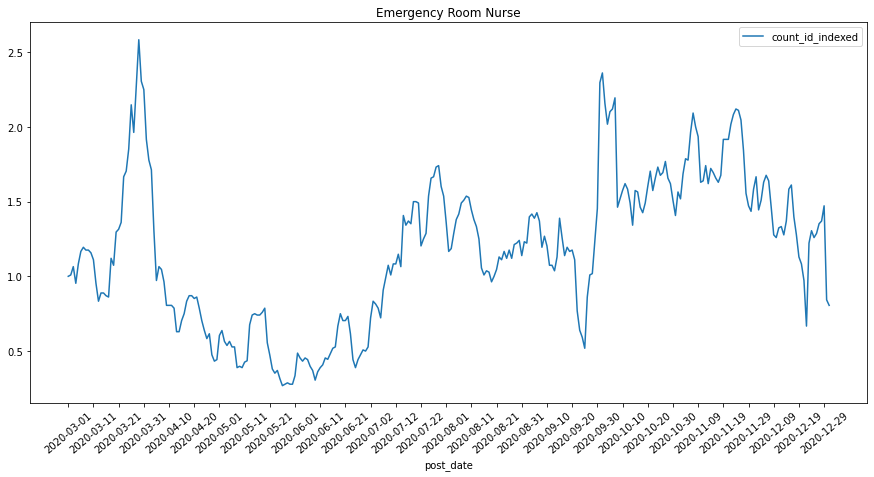

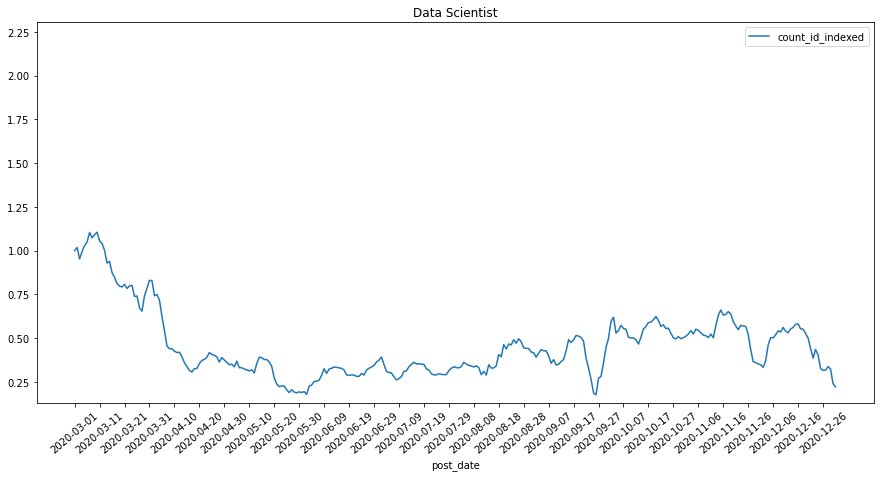

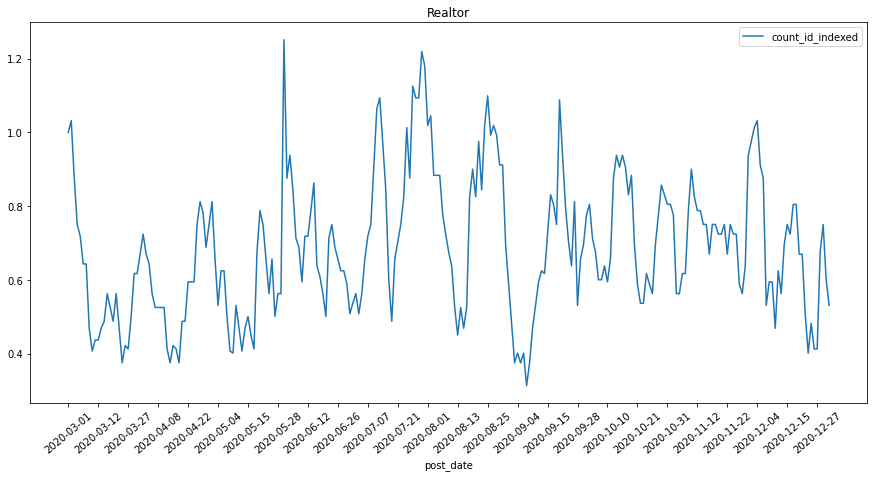

In [49]:
plt.rcParams["figure.figsize"] = (15, 7)
df_ernurse.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(df_ernurse.get('post_date')), 10), 
           labels = df_ernurse.iloc[::10, :].get('post_date'), rotation = 40)
plt.title("Emergency Room Nurse")

plt.rcParams["figure.figsize"] = (15, 7)
df_dsc.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(df_dsc.get('post_date')), 10), 
           labels = df_dsc.iloc[::10, :].get('post_date'), rotation = 40)
ymin, ymax = plt.ylim()
plt. ylim(ymin, ymax * 2)
plt.title("Data Scientist")

plt.rcParams["figure.figsize"] = (15, 7)
df_realtor.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(df_realtor.get('post_date')), 10), 
           labels = df_realtor.iloc[::10, :].get('post_date'), rotation = 40)
ymin, ymax = plt.ylim()
plt. ylim(ymin, ymax)
plt.title("Realtor")

Text(0.5, 1.0, 'California')

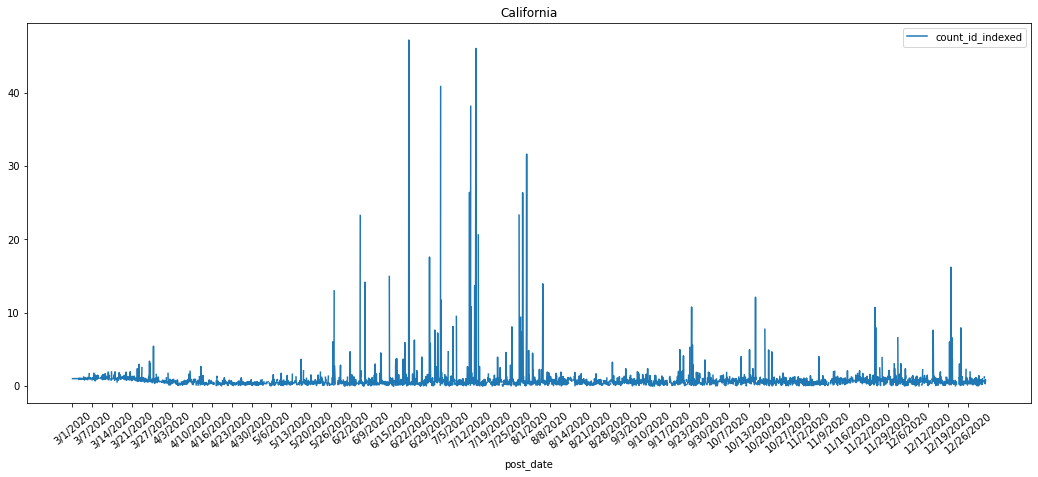

In [62]:
ca = geo[geo['state'] == 'CA']
ca_dates = ca.get('post_date')
ca_dates = dateFilter(ca_dates)
ca = ca[ca['post_date'].isin(ca_dates)]

plt.rcParams["figure.figsize"] = (18, 7)
ca.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed');
plt.xticks(np.arange(0, len(ca.get('post_date')), 100), 
           labels = ca.iloc[::100, :].get('post_date'), rotation = 40)
plt.title("California")